<h1>CAPSTONE 2: Retail Sales Forecast for 45 Walmart Stores</h1>

Data source: Walmart.csv (from Kaggle.com)

1. Data Wrangling
2. Exploratory Data Analysis



In [361]:
from pathlib import Path

import os
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

import ydata_profiling
from ydata_profiling.utils.cache import cache_file

In [458]:
#Load the walmart.csv file into a dataframe
path = 'Walmart.csv'
df = pd.read_csv(path)

print(df.info())
print(df.head())
print(df.isna().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  

<b>Observations:</b> No null values.  Date format is not our ideal format YYYY-MM-DD

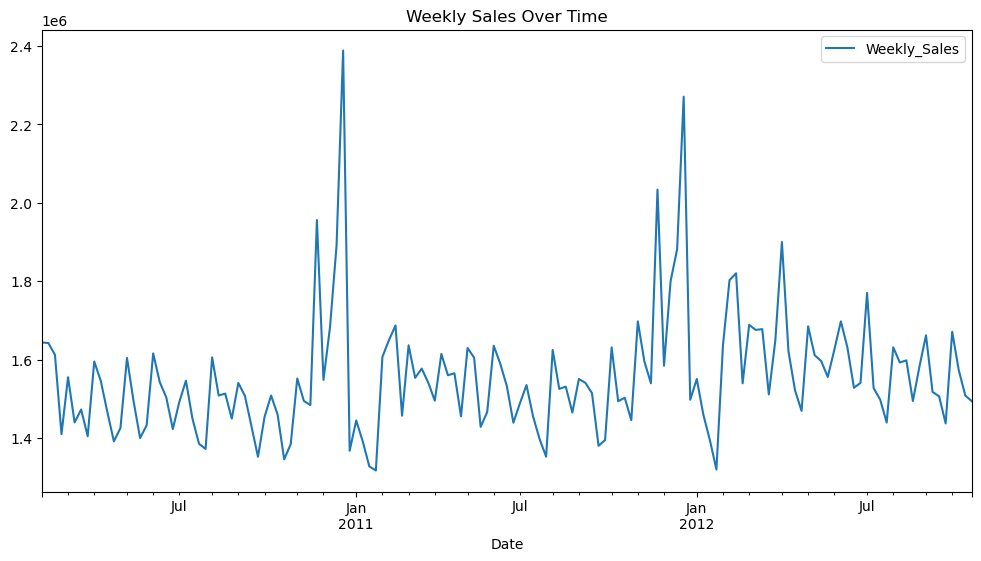

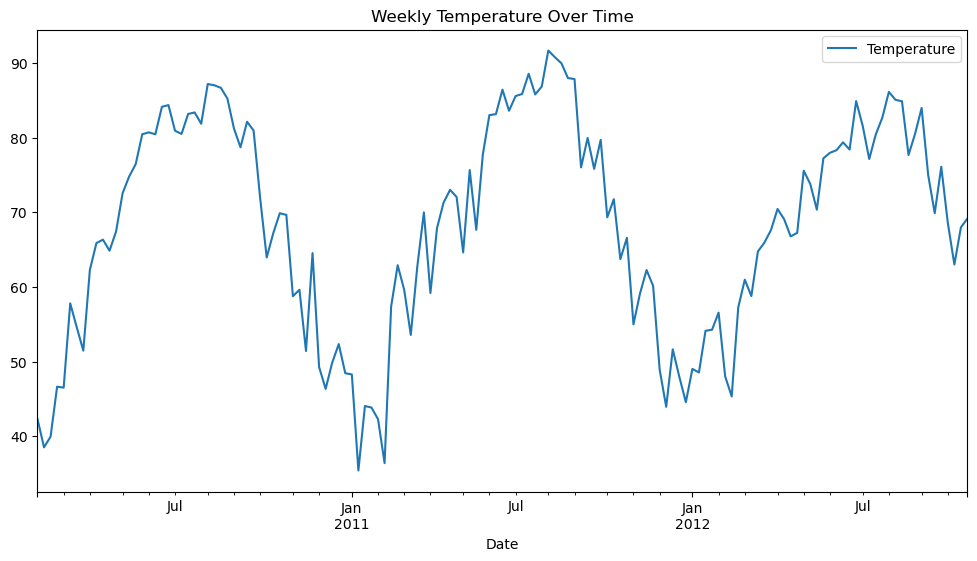

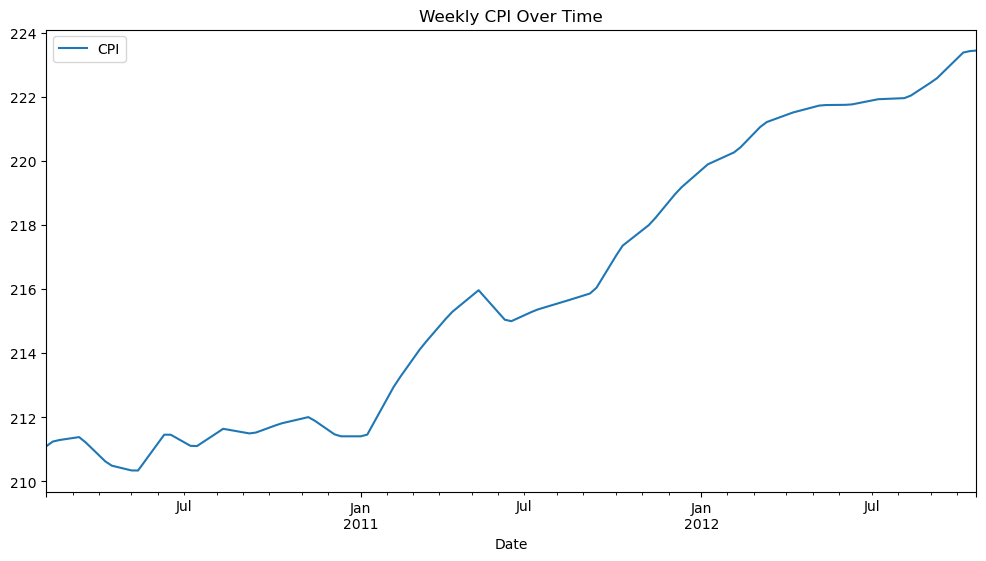

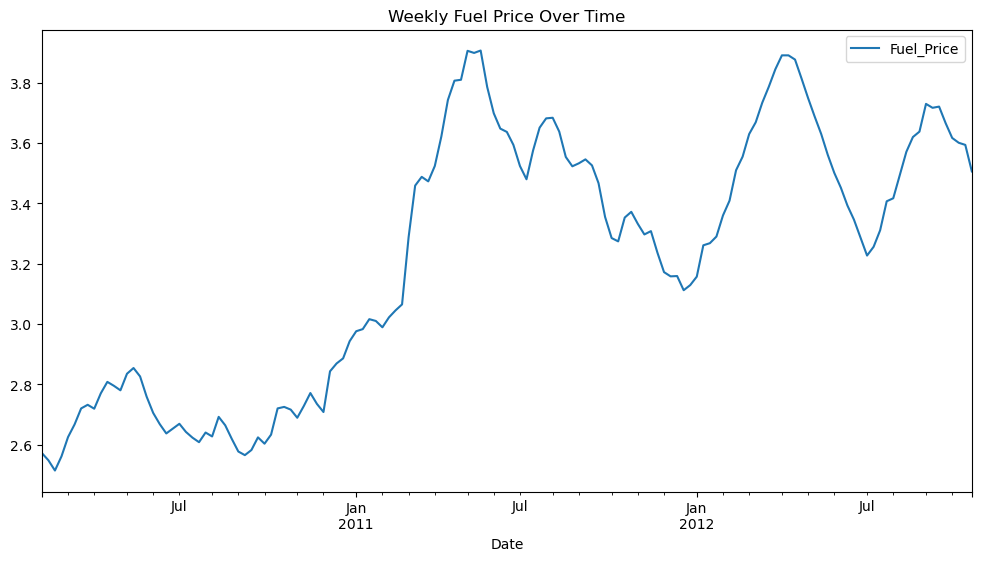

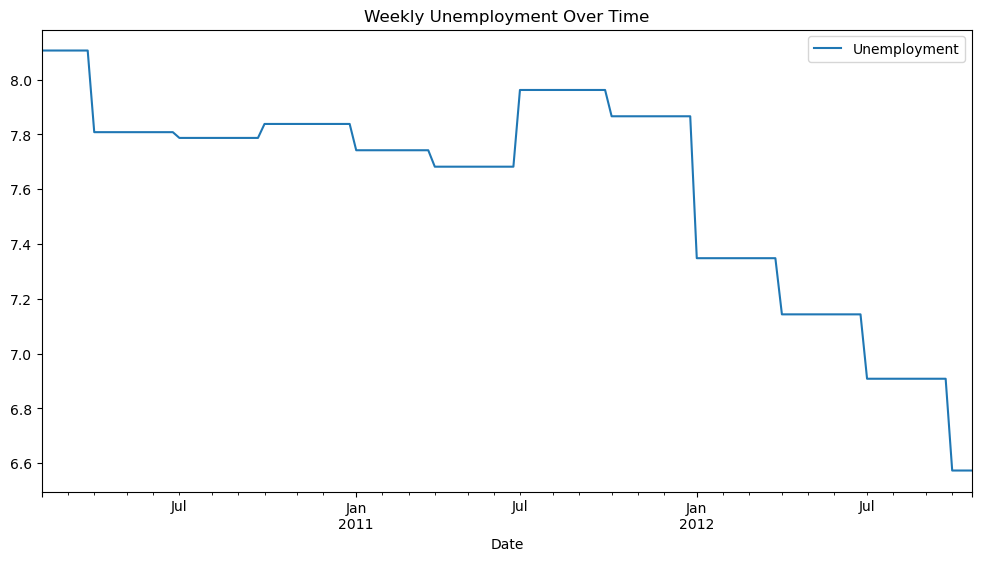

In [383]:
#Build a few trend charts to get sense of the data, may need to filter by sample set of stores

#df_store1 = df[df['Store'] == 1]

df_store1.plot(x='Date', y='Weekly_Sales', kind='line', figsize=(12,6), title='Weekly Sales Over Time')

#plot temp, using avg. and then compare with sample for 1 store
df_store1.plot(x='Date', y='Temperature', kind='line', figsize=(12,6), title='Weekly Temperature Over Time')

#plot cpi, using avg. and then compare with sample for 1 store
df_store1.plot(x='Date', y='CPI', kind='line', figsize=(12,6), title='Weekly CPI Over Time')

#plot fuel price, using avg. and then compare with sample for 1 store
df_store1.plot(x='Date', y='Fuel_Price', kind='line', figsize=(12,6), title='Weekly Fuel Price Over Time')

#plot unemployment, using avg. and then compare with sample for 1 store
df_store1.plot(x='Date', y='Unemployment', kind='line', figsize=(12,6), title='Weekly Unemployment Over Time')

plt.show()



In [387]:
df['Weekly_Sales'] = df['Weekly_Sales'] / 1000000
#sales_holidayrevenue = df.groupby(['Holiday_Flag'])['Weekly_Sales'].sum()
sales_holidayrevenue = df.groupby(['Holiday_Flag'])['Weekly_Sales'].agg(['sum', 'count'])
sales_holidayrevenue.T

print(sales_holidayrevenue)



                      sum  count
Holiday_Flag                    
0             6231.919436   5985
1              505.299552    450


<B>Inference</B>: Holiday flag = 1 is 7% of total all flags.

<B>Boxplots</B>




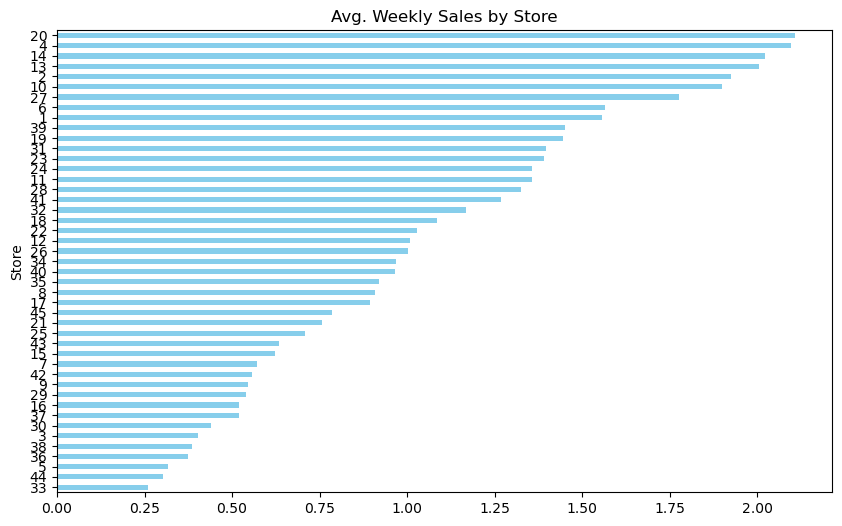

In [454]:
#Avg. weekly sales by store charted in bar chart
df_avgweekly_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=True)
df_avgweekly_sales.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Avg. Weekly Sales by Store')
plt.show()

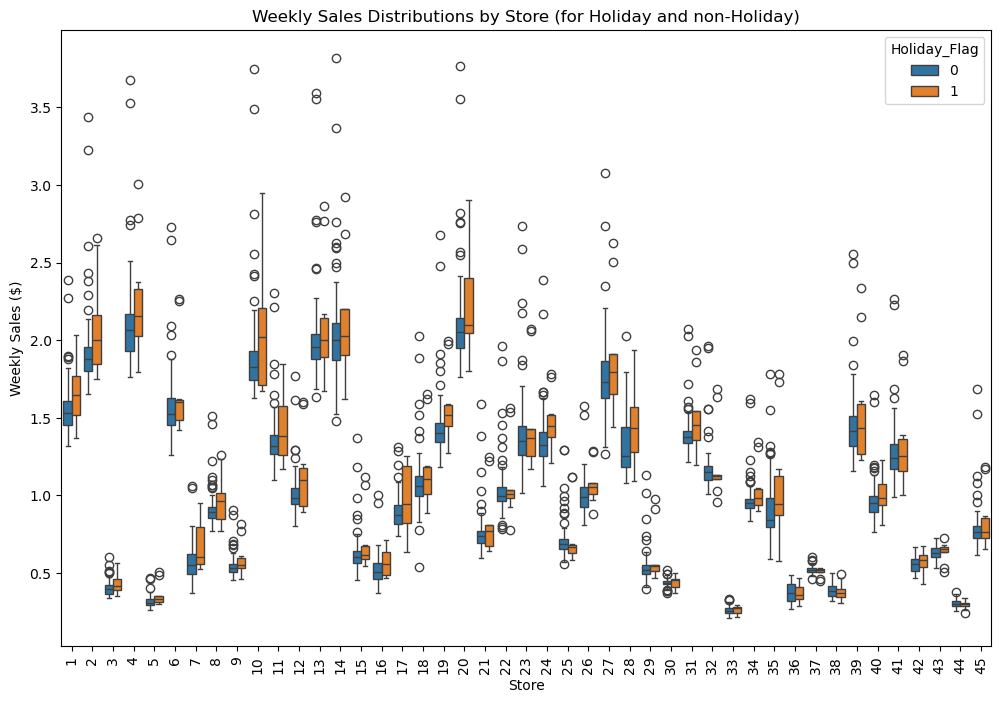

In [403]:
#Create a seaborn boxplot of the ticket price dataframe we created above,
#with 'state' on the x-axis, 'Price' as the y-value, and a hue that indicates 'Ticket'
#This will use boxplot's x, y, hue, and data arguments.
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Store', y='Weekly_Sales', hue='Holiday_Flag', data=df)
plt.xticks(rotation='vertical')
plt.ylabel('Weekly Sales ($)')
plt.xlabel('Store')
plt.title('Weekly Sales Distributions by Store (for Holiday and non-Holiday)')
plt.show()

<b>Observation</b> 

Overall, most stores weekly sales figure range between $1.0M to $2.5M, with high weekly sales above $3M for five stores(2, 4, 10, 13, 14, 20) and slightly lower for another four above $2.5M.  All but two stores have outliers.  

With the exception of less than handful of stores where mean weekly sales is lower than non-holiday, most holidays generate higher weekly revenue on avg. Surprisingly, the weekly sales outliers are not just on those flagged as holidays.  

Maybe, further investigate the outlier weeks that are not holidays.  Depending on what's found, consider dropping those rows.  For 



<h1>SUMMARY OF EXPLORATORY DATA ANALYSIS</h1>

<b>STRUCTURE AND TYPES</b>
- 8 features 
    - numerical: weekly_sales, temperature, fuel_price, CPI, unemployment
    - categorical: date, holiday_flag, store
- 6,435 observations

<b>VERIFIED</b>
- 45 stores and 2 values for holiday_flag, appears correct 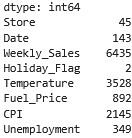
- Min and max values look realistic 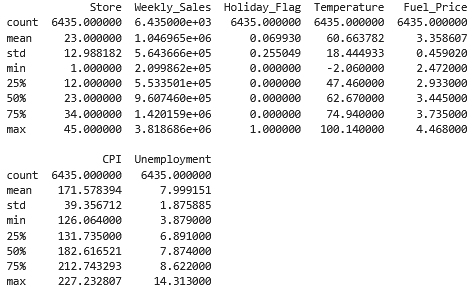

<b>MISSING OR NULL VALUES</b>
- None of the columns have missing data or null values, so no need to drop, impute, or flag

<b>OUTLIER OR ANOMALIES</b>
- Genuine extremes-- look into the holiday flags and distribution of revenue-- boxplots

<b>DISTRIBUTIONS</b> 
- Holiday flag is imbalanced, with 7% of values = 1 and 93% = 0.  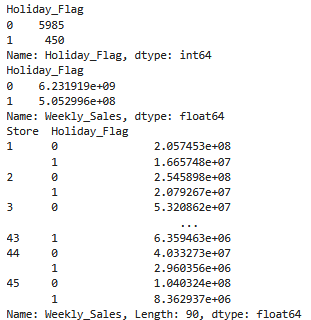
- Weekly_Sales is right-skewed with some outliers at $3.5M. 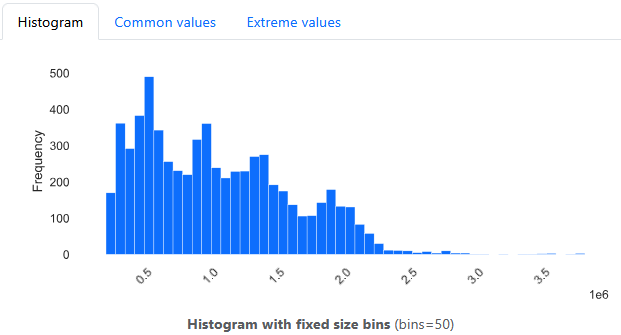
- CPI has a bimodal distribution.  Investigate further. 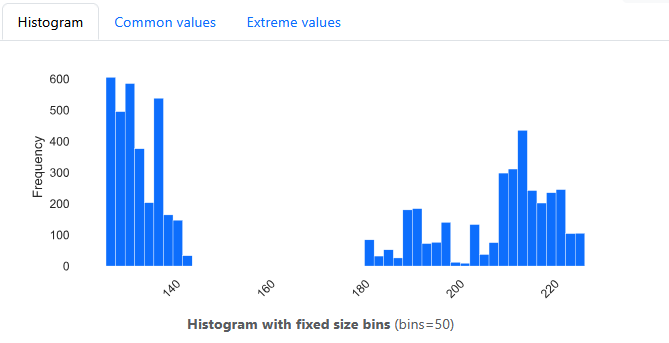

<b>RELATIONSHIPS</b>
- Most features show weak correlation or no correlations, but there are some interesting relationships. 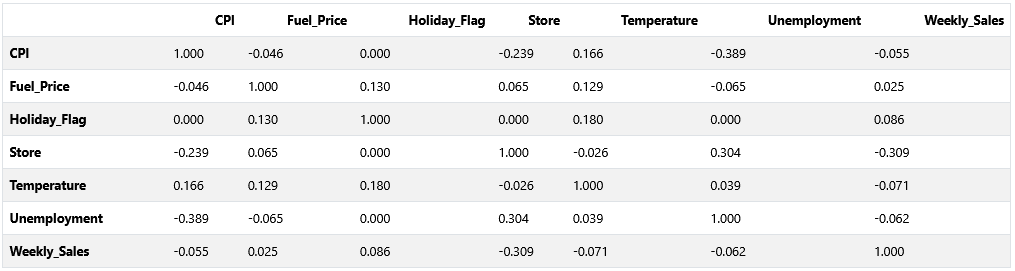
  - Stores and unemployment: Moderate positive correlation(.30), some stores may be in areas with higher unemployment
  - Unemployment and CPI: Moderate negative correlation(-.389), as unemployment increases, CPI tends to decrease
  - Temperature and Holiday fag: Weak positive correlation (.18), as holidays might occur during warmer periods
- Since we don't have linear relationships with weekly_sales, we'll need to look at seasonality and consider feature engineering
- After some feature engineering with datetime 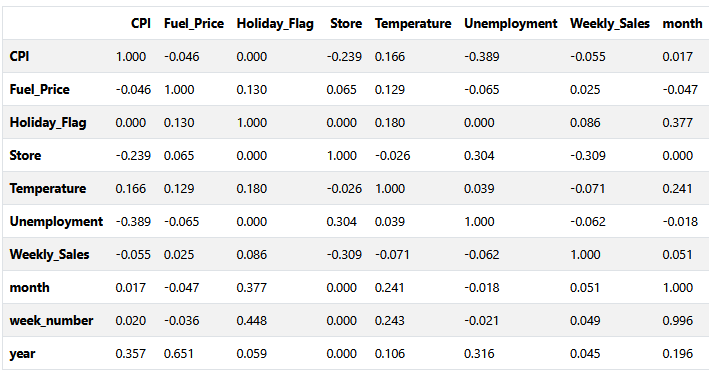

<b>FEATURE ENGINEERING CONSIDERATIONS</b>
- Year, month, day, week_no, day_of_week COMPLETE
- Promotional timeframe(maybe)  
- Tier stores by avg. weekly sales mean
- Categorize the specific holidays because some may have a stronger relationship than others






<H1>YDATA PROFILING - TOOL USED FOR EDA</H1>

<b> Run profiling on original data set. </b>

In [335]:
#inline report w/o saving any object

report = df.profile_report(
    sort=None, html={"style": {"full_width": True}}, progress_bar=False
)
report

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 62.24it/s]


In [336]:
profile_report = df.profile_report(html={"style": {"full_width": True}})
profile_report.to_file("y-dataprofiling.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 216.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<b>Observation</b>: The column Date is not a DateTime object.  Also, the format is DD-MM-YYYY, so we'll convert it to YYYY-MM-DD

In [464]:
# Extract date elements and create new columns.  Returned to do this as a result of YData Profiling.  

#print(df['Date'].head())

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') 
print(df['Date'].head())

df['Date'] = df['Date'].dt.strftime('%m-%d-%Y')  
df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week_number'] = df['Date'].dt.isocalendar().week
df['day_of_week'] = df['Date'].dt.day_name()

print(df.head())

#df_filtertest = df[df['Store'] == 1]
#print(df_filtertest.head())


0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  year  month  week_number day_of_week  
0  211.096358         8.106  2010      2            5      Friday  
1  211.242170         8.106  2010      2            6      Friday  
2  211.289143         8.106  2010      2            7      Friday  
3  211.319643         8.106  2010      2            8      Friday  
4  211.350143         8.106  2010      3            9      Friday  


In [466]:
# Classify dates with the 4 major promotions

<b> Run profiling again on dataset with date features</b>

In [472]:
#inline report w/o saving any object

report = df.profile_report(
    sort=None, html={"style": {"full_width": True}}, progress_bar=False
)
report

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 160.97it/s]



Investigate holiday flag and weekly_sales.  What % does holiday make up a whole? Consistent across years?  Consistent across store ID?
